# Cos'è un albero decisionale e come funziona?
Se la casa ha più di 2 bagni allora stimiamo che abbia un prezzo di 188k, altrimenti stimiamo che abbia un prezzo di 178k

## Data Exploration 

In [2]:
# useremo la libreria di Python Pandas
import pandas as pd

In [3]:
# analizziamo un dataset di case a melbourne https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

# iniziamo creando un DataFrame, che è come un Excel 

# leggi i dati e salvali in un DataFrame chiamato melbourne_data
melbourne_data = pd.read_csv('melb_data.csv') 

# per venedre i primi 5
melbourne_data.head()



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# mostra un sintesi del dataset - cosa significa count - ad esempio se ha solo una stanza non viene misurata la seconda
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


https://quizizz.com/admin/quiz/65cddc3106712c537a9b9759?at=65cddcbce106f96ee583cbec

In [5]:
# Quali sono le variabilii presenti
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# Per ognuna quanti sono gli unique values
melbourne_data.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [12]:
# Vediamo per la variabile type, quali sono i valori possibili
# prima devo seleionare una sola colonna (si può fare con dot notation o con colonne)
melbourne_data.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [13]:
# Ora vediamo quanti ce ne sono per ciascun tipo
melbourne_data.Type.value_counts()

Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

In [14]:
# Abbiamo visto come selezionare le prima 10 righe, ora prendiamo le ultime 20
melbourne_data.tail(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13560,Templestowe Lower,50 Caroline Dr,5,h,1400000.0,S,Barry,26/08/2017,12.4,3107.0,...,3.0,2.0,717.0,310.0,1963.0,NaN,-37.76630,145.11320,Eastern Metropolitan,5420.0
13561,Templestowe Lower,7 Dove Ct,4,h,1288000.0,S,Barry,26/08/2017,12.4,3107.0,...,2.0,2.0,948.0,NaN,NaN,NaN,-37.76078,145.10696,Eastern Metropolitan,5420.0
13562,Thornbury,7 Ballantyne St,3,h,1450000.0,S,Woodards,26/08/2017,7.0,3071.0,...,1.0,1.0,312.0,NaN,NaN,NaN,-37.75870,144.99966,Northern Metropolitan,8870.0
13563,Thornbury,201 Gooch St,3,h,1271000.0,S,Nelson,26/08/2017,7.0,3071.0,...,1.0,2.0,470.0,151.0,1950.0,NaN,-37.75937,145.01534,Northern Metropolitan,8870.0
13564,Tullamarine,7 Londrew Ct,3,h,540000.0,S,Barry,26/08/2017,12.9,3043.0,...,1.0,1.0,607.0,102.0,1970.0,NaN,-37.69423,144.88002,Western Metropolitan,3296.0
13565,Vermont,73 Nurlendi Rd,4,h,1263500.0,S,Barry,26/08/2017,17.2,3133.0,...,2.0,2.0,791.0,NaN,NaN,NaN,-37.84467,145.19276,Eastern Metropolitan,4181.0
13566,Vermont South,9 Winswood Cl,4,h,1250000.0,PI,Philip,26/08/2017,17.2,3133.0,...,2.0,2.0,986.0,NaN,NaN,NaN,-37.84679,145.20051,Eastern Metropolitan,4280.0
13567,Viewbank,149 Graham Rd,5,h,1316000.0,SP,Nelson,26/08/2017,8.9,3084.0,...,3.0,3.0,696.0,NaN,NaN,NaN,-37.73501,145.08341,Eastern Metropolitan,2698.0
13568,Wantirna,16 chesterfield Ct,4,h,951000.0,S,Ray,26/08/2017,14.7,3152.0,...,2.0,2.0,704.0,200.0,1981.0,NaN,-37.85639,145.23536,Eastern Metropolitan,5424.0
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,551.0,NaN,NaN,NaN,-37.87608,145.22390,Eastern Metropolitan,7082.0


In [15]:
# Ora vediamo come selezionare solamente certe colonne. In questo caso usaremo le parentesi quadre
# Il default per head è 5
features = ['Rooms', 'Type', 'Price']
melbourne_data[features].head()

,Rooms,Type,Price
0,2,h,1480000.0
1,2,h,1035000.0
2,3,h,1465000.0
3,3,h,850000.0
4,4,h,1600000.0


In [19]:
# Una volta ottenuto un Pandas Series, possiamo chiamare certi metodi 
# ad esempio proviamo a trovare la media del prezzo delle case
melbourne_data.Price.mean()

1075684.079455081

In [23]:
# oppure il prezzo massimo
melbourne_data.Price.max()

9000000.0

In [24]:
# Volendo posso farlo per tutte le variabili - vediamo che in alcune colonne mancano dei valori
melbourne_data.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [18]:
# Controlliamo i missing values - dopo capiremo perché
melbourne_data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [25]:
# Ora proviamo a vedere come filtrare 
# Ad esempio teniamo solo le case di tipo house
melbourne_data[melbourne_data.Type == 'h']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [28]:
# Ora aggiungiamo una condizione, devo anche avere un prezzo minore di 500k
melbourne_data[(melbourne_data.Type == 'h') & (melbourne_data.Price < 500000)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
533,Balwyn,9/204 Whitehorse Rd,1,h,390000.0,VB,Jellis,10/09/2016,9.7,3103.0,...,1.0,1.0,740.0,NaN,NaN,Boroondara,-37.81250,145.07750,Southern Metropolitan,5682.0
1036,Braybrook,11/27 Marnoo St,3,h,495000.0,S,Burnham,27/06/2016,10.8,3019.0,...,1.0,1.0,158.0,138.0,2005.0,Maribyrnong,-37.78890,144.84650,Western Metropolitan,3589.0
1456,Brunswick West,1/536 Albion St,2,h,440000.0,PI,Jellis,28/08/2016,5.9,3055.0,...,1.0,1.0,0.0,62.0,1960.0,Moreland,-37.75770,144.93540,Northern Metropolitan,7082.0
1805,Caulfield,30 Pyne St,4,h,131000.0,PI,Rodney,25/02/2017,8.9,3162.0,...,1.0,2.0,499.0,155.0,1920.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379.0
1927,Coburg,171 Moreland Rd,4,h,145000.0,PI,Jellis,4/06/2016,7.8,3058.0,...,1.0,1.0,536.0,164.0,1910.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13428,Frankston North,7 Huon Ct,3,h,493000.0,S,Barry,26/08/2017,36.9,3200.0,...,1.0,1.0,657.0,91.0,1975.0,NaN,-38.12023,145.15188,Eastern Victoria,2500.0
13488,Melton South,1 Fraser St,3,h,395000.0,S,YPA,26/08/2017,29.8,3338.0,...,1.0,1.0,649.0,105.0,1975.0,NaN,-37.69891,144.57645,Western Victoria,4718.0
13537,Roxburgh Park,8 Kennedy Pde,4,h,465000.0,S,Ray,26/08/2017,20.6,3064.0,...,2.0,1.0,417.0,NaN,1999.0,NaN,-37.62273,144.92567,Northern Metropolitan,5833.0
13546,Sunbury,7 Fullbrook Dr,3,h,480000.0,PI,Leeburn,26/08/2017,31.7,3429.0,...,2.0,2.0,646.0,NaN,NaN,NaN,-37.56005,144.70892,Western Metropolitan,14092.0


In [36]:
# Come funziona ? Se usiamo un operatore con una Pandas Series, otterremo un'altra Pandas Series
# in cui ogni valore viene confrontato e l'output è un Boolean
melbourne_data.Type == 'h'

0        True
1        True
2        True
3        True
4        True
         ... 
13575    True
13576    True
13577    True
13578    True
13579    True
Name: Type, Length: 13580, dtype: bool

pandas.core.series.Series

In [12]:
# Ora vediamo come creare un grafico a barre
# Ad esempio del numero di stanze
# creiamo un Series Pandas, da cui dovremmo prendere l'indice (quello a sx) e i valori (a dx)
rooms_c = melbourne_data.Rooms.value_counts()
rooms_c

Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: count, dtype: int64

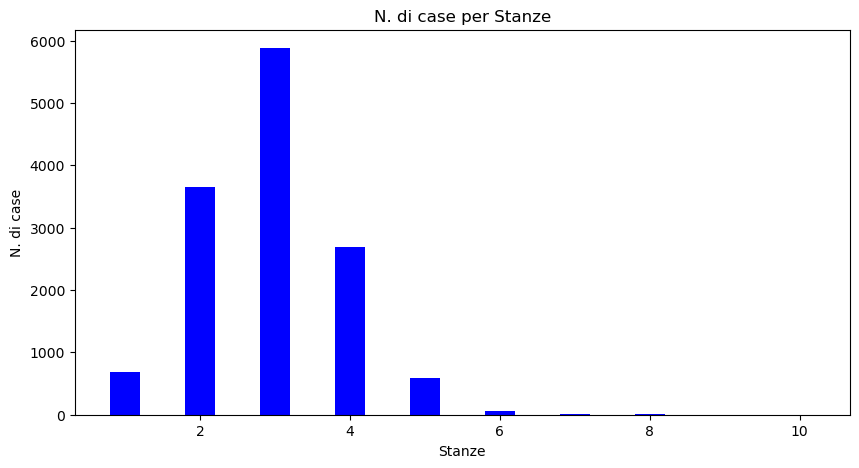

In [15]:

# usiamo un'altra libreria che si chiama matplotlib
import matplotlib.pyplot as plt

# creiamo l'oggetto fig e definiamo le dimensioni
fig = plt.figure(figsize = (10, 5))

# forniamo i dati
plt.bar(rooms_c.index, rooms_c.values, color ='blue', 
        width = 0.4)

# Possiamo inserire dei titoli ad esempio sull'asse delle x e delle y
plt.xlabel("Stanze")
plt.ylabel("N. di case")
plt.title("N. di case per Stanze")
plt.show()


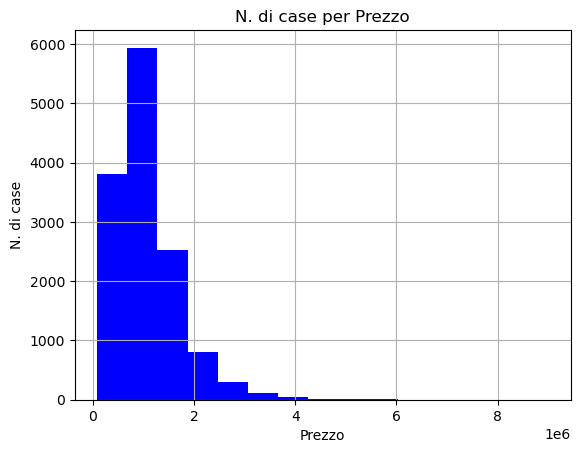

In [22]:
# Ora proviamo a vedere la distribuzione dei prezzi con un istogramma
# questa volta possiamo semplicemente chiamare il metodo plt sul dataframe
melbourne_data.Price.hist(bins=15, color ='blue')
plt.xlabel("Prezzo")
plt.ylabel("N. di case")
plt.title("N. di case per Prezzo")
plt.show()


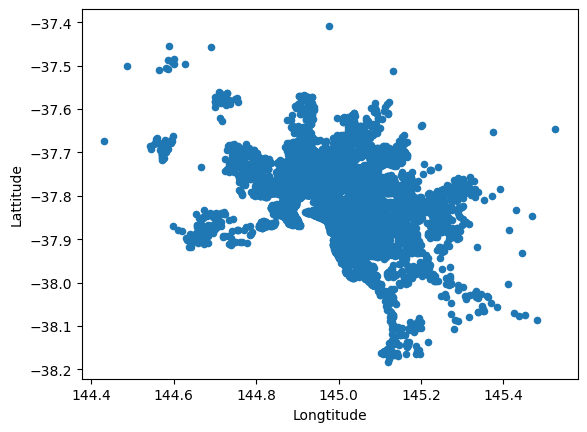

In [24]:
# Ora creaimo uno scatter plot per visualizzare latitudine e longitudine
melbourne_data.plot.scatter(x = 'Longtitude', y = 'Lattitude')
plt.show()

## Il tuo primo modello di Machine Learning

In [13]:
# mostra le colonne
import pandas as pd

melbourne_data = pd.read_csv('melb_data.csv') 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [14]:
# ci sono alcuni buchi nei dataset. Questi sono detti missing values e sono spesso indicati con na (not available)

melbourne_data = melbourne_data.dropna(axis=0)


In [15]:
# ora dobbiamo selezionare delle colonne specifcihe - ci sono due modi, dot notation e lista di colonne

# prima dobbiamo decidere il nostro target, che è la variabile da predirre. Come formato sarà una Series, che è come un DataFrame, però con solo una colonna
# viene indicata con y minuscola, come un vettore


y = melbourne_data.Price

In [16]:
# le colonne usate per predirre il prezzo vengono chiamate features
# potremmo usare tutte le features disponibili ma spesso la predizione è migliore se se ne usano solo alcune
# usiamo una lista per selezionare certe features
# l'insieme delle features per predirre vengono indicate con la X maiuscola (come una matrice)

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

X.describe()
X.head()



,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Creare un modello 

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
#1. definisci il modello
melbourne_model = DecisionTreeRegressor(random_state=1)
#2. fitta il modello
melbourne_model.fit(X, y)
#3. predici - prediciamo i prezzi delle prime 5 case, anche se di solito è su case nuove
print(melbourne_model.predict(X.head()))


[1035000. 1465000. 1600000. 1876000. 1636000.]


# Valutazione del modello

Se una casa costa $150,000 e hai predetto che sarebbe costata $100,000 l'errore è $50,000.
Il Mean absolute error si ottiene prendendo tutti gli errori, calcolandone il valore assoluto e facendone la media.
Questo può dirti di quanto le predizioni sono sbagliate in media.


In [20]:
# Come si calcola?
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

69256.2332149774

In [21]:
# è importante non usare gli stessi dati con cui si fa il training per predirre la qualità del modello
# la parte dei dati usata per misurare la performance è separata e viene chiamata validation set 
# per separarla automaticamente possiamo usare sklearn

from sklearn.model_selection import train_test_split

# suddividere i dati in dati  training e  validation, sia per features che per target
# La suddivisione si basa su un generatore di numeri casuali. Forniamo un valore numerico 
# come random_state per avere la stessa suddivisione ogni volta 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Definisci il modello
melbourne_model = DecisionTreeRegressor()
# Fitta il modello
melbourne_model.fit(train_X, train_y)

# Ottieni i prezzi predetti con il validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

274571.11039380246


In [22]:
# l'errore medio è abbastaza alto. Se consideriamo che il prezzo medio di una casa è $1M, l'errore medio è circa il quarto

In [ ]:
# Possiamo ora provare a sperimentare con diversi algoritmi, per vedere se è possibile migliorare la performance
# Anche per un semplice albero decisionale possiamo selezionare la profondità, che indica quante divisioni ci sono nell'albero
# quando però ci sono tanti livelli, si arriva ad avere poche case su ogni "foglia": questo si chiama overfitting e significa che le separazioni sono state fatte apposta per un data point, e quindi non generalizzano bene
# anche quando ci sono pochi gruppi, ad esempio solo 2 o 3, potrebbe essere un problema e non funzionare bene: questo si chiama "underfitting"


![](validation-test-perf.png)

Come facciamo a trovare la profondità migliore?
Andremo a misurare il MAE sul validation set per diverse profondità e poi terremo il migliore.
Confrontiamo progressivamente parametri 10 volte maggiori (5,50,500,5000)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


# Bonus:  Random Forest
La Random Forest è un insieme di tanti decision trees. Performa meglio e il vantaggio è che solitamente non ha troppo bisogno di fine-tuning.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))